In [4]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()


Saving global_inflation_data.csv to global_inflation_data (1).csv


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet




# Time series forecasting
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # (optional, if you want to try Prophet)

# Warnings & display settings
import warnings
warnings.filterwarnings("ignore")




In [6]:
# Load into Pandas (replace filename with yours if different)
df = pd.read_csv("global_inflation_data.csv")

# Preview
df.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual average inflation (consumer prices) rate,13.4,22.2,18.2,15.9,20.4,8.7,-2.1,18.4,...,-0.66,4.38,4.98,0.63,2.3,5.44,5.06,13.71,9.1,NaN
1,Albania,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.30,2.00,2.00,1.4,1.60,2.00,6.70,4.8,4.0
2,Algeria,Annual average inflation (consumer prices) rate,9.7,14.6,6.6,7.8,6.3,10.4,14.0,5.9,...,4.80,6.40,5.60,4.30,2.0,2.40,7.20,9.30,9.0,6.8
3,Andorra,Annual average inflation (consumer prices) rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.10,-0.40,2.60,1.00,0.5,0.10,1.70,6.20,5.2,3.5
4,Angola,Annual average inflation (consumer prices) rate,46.7,1.4,1.8,1.8,1.8,1.8,1.8,1.8,...,9.20,30.70,29.80,19.60,17.1,22.30,25.80,21.40,13.1,22.3


In [7]:
# Shape of dataset
print("Shape:", df.shape)

# Column info
df.info()

# Check missing values
df.isnull().sum()

# Quick stats
df.describe()


Shape: (196, 47)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            140 non-null    float64
 3   1981            144 non-null    float64
 4   1982            145 non-null    float64
 5   1983            145 non-null    float64
 6   1984            145 non-null    float64
 7   1985            145 non-null    float64
 8   1986            145 non-null    float64
 9   1987            147 non-null    float64
 10  1988            147 non-null    float64
 11  1989            147 non-null    float64
 12  1990            150 non-null    float64
 13  1991            155 non-null    float64
 14  1992            158 non-null    float64
 15  1993            169 non-null    float64
 16  1994            171 non-null    float64
 17  1995            17

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,140.000000,144.000000,145.000000,145.000000,145.000000,145.000000,145.000000,147.000000,147.000000,147.000000,...,194.000000,194.000000,195.000000,195.000000,195.000000,194.000000,194.000000,194.000000,192.000000,191.000000
mean,21.757143,17.796528,17.029655,19.177241,26.979310,103.215172,25.262069,111.294558,58.635374,101.246259,...,4.116186,6.594742,7.656821,339.688359,107.294872,19.832680,16.577629,13.616031,13.736458,9.309424
std,33.656118,18.992691,22.797064,34.806824,111.889811,975.748316,86.931210,1081.094434,400.370989,679.792142,...,10.763149,31.096216,34.954954,4681.227548,1425.256254,173.722612,117.154632,25.282229,39.667874,25.195589
min,-7.300000,0.000000,-0.900000,-8.500000,-7.400000,-16.000000,-17.600000,-31.200000,-13.000000,-9.600000,...,-3.800000,-5.600000,-13.300000,-44.400000,-3.200000,-2.600000,-3.000000,-3.200000,-0.800000,1.200000
25%,9.550000,8.600000,6.100000,5.000000,3.800000,2.800000,1.800000,2.150000,2.550000,3.350000,...,0.100000,0.100000,1.150000,1.300000,0.800000,0.400000,1.925000,5.500000,4.000000,2.800000
50%,13.850000,12.500000,10.300000,8.700000,8.000000,7.100000,5.800000,5.900000,6.800000,6.900000,...,1.500000,1.500000,2.400000,2.500000,2.200000,1.900000,3.500000,8.100000,5.800000,4.000000
75%,20.525000,19.800000,16.700000,16.000000,17.100000,16.800000,18.200000,16.650000,17.800000,16.700000,...,4.800000,5.125000,5.200000,4.300000,4.000000,4.575000,5.975000,11.975000,9.925000,5.800000
max,316.600000,116.800000,123.600000,275.600000,1281.300000,11749.600000,885.200000,13109.500000,4775.200000,7428.700000,...,121.700000,346.100000,438.100000,65374.100000,19906.000000,2355.100000,1588.500000,193.400000,360.000000,222.400000


In [8]:
df_long = df.melt(
    id_vars=["country_name"],
    var_name="year",
    value_name="inflation_rate"
)

# Clean
df_long["year"] = pd.to_numeric(df_long["year"], errors="coerce")
df_long["inflation_rate"] = pd.to_numeric(df_long["inflation_rate"], errors="coerce")

# Drop missing values
df_long = df_long.dropna()

df_long.head()

,country_name,year,inflation_rate
196,Afghanistan,1980.0,13.4
198,Algeria,1980.0,9.7
200,Angola,1980.0,46.7
201,Antigua and Barbuda,1980.0,19.0
205,Australia,1980.0,10.1


In [9]:
print("Number of countries:", df_long["country_name"].nunique())
print("Years:", df_long["year"].min(), "-", df_long["year"].max())
print("Missing values:", df_long["inflation_rate"].isna().sum())


Number of countries: 196
Years: 1980.0 - 2024.0
Missing values: 0


In [39]:
# Compute global average inflation per year
world_inflation = df_long.groupby("year")["inflation_rate"].mean().reset_index()

# Plot global trend
fig = px.line(
    world_inflation, x="year", y="inflation_rate", markers=True
)

# Add key global events
fig.add_vline(x=2008, line_dash="dash", line_color="red")
fig.add_annotation(x=2008, y=world_inflation["inflation_rate"].max(),
                   text="2008 Financial Crisis", showarrow=True, arrowhead=1)

fig.add_vline(x=2020, line_dash="dash", line_color="red")
fig.add_annotation(x=2020, y=world_inflation["inflation_rate"].max(),
                   text="COVID-19 Pandemic", showarrow=True, arrowhead=1)

fig.update_layout(
    title="Global Average Inflation Trend with Key Events",
    xaxis_title="Year",
    yaxis_title="Inflation Rate (%)",
    template="plotly_white"
)

fig.show()


In [19]:
countries = ["Philippines", "United States", "Japan", "China, People's Republic of"]
subset = df_long[df_long["country_name"].isin(countries)]

fig = px.line(
    subset,
    x="year",
    y="inflation_rate",
    color="country_name",
    markers=True,
    title="Inflation Rate Comparison (Philippines, US, Japan, China, People's Republic of)",
    labels={"inflation_rate": "Inflation Rate (%)", "year": "Year"}
)

fig.update_traces(line=dict(width=3))
fig.update_layout(
    template="plotly_white",
    title_font=dict(size=20, family="Arial", color="black"),
    legend_title="Country",
    legend=dict(orientation="h", y=-0.2)
)
fig.show()


In [14]:
avg_inflation = df_long.groupby("country_name")["inflation_rate"].mean().sort_values(ascending=False)
print("Top 10 highest inflation countries:\n", avg_inflation.head(10))
print("\nTop 10 lowest inflation countries:\n", avg_inflation.tail(10))


Top 10 highest inflation countries:
 country_name
Venezuela                  2041.728889
Congo, Dem. Rep. of the     791.651111
Nicaragua                   676.153333
Bolivia                     311.904444
Armenia                     291.196875
Peru                        288.193333
Brazil                      263.780000
Angola                      249.820000
Ukraine                     232.196970
Turkmenistan                223.990625
Name: inflation_rate, dtype: float64

Top 10 lowest inflation countries:
 country_name
Singapore            2.122222
Puerto Rico          2.081818
Andorra              2.069565
San Marino           2.031818
Oman                 1.840000
Bahrain              1.655556
Switzerland          1.617778
Saudi Arabia         1.315556
Brunei Darussalam    1.137209
Japan                1.071111
Name: inflation_rate, dtype: float64


In [15]:
# Subset Philippines and US
ph_data = df_long[df_long["country_name"] == "Philippines"][["year", "inflation_rate"]]
us_data = df_long[df_long["country_name"] == "United States"][["year", "inflation_rate"]]

# Sort by year
ph_data = ph_data.sort_values("year")
us_data = us_data.sort_values("year")

ph_data.tail(), us_data.tail()


(        year  inflation_rate
 8173  2020.0             2.4
 8369  2021.0             3.9
 8565  2022.0             5.8
 8761  2023.0             5.8
 8957  2024.0             3.2,
         year  inflation_rate
 8222  2020.0             1.3
 8418  2021.0             4.7
 8614  2022.0             8.0
 8810  2023.0             4.1
 9006  2024.0             2.8)

In [16]:
def forecast_arima(data, country, steps=5):
    """
    Forecasts inflation using ARIMA and plots historical vs forecasted values.
    """
    # Ensure year is index
    series = data.set_index("year")["inflation_rate"]

    # Fit ARIMA
    model = ARIMA(series, order=(1,1,1))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=steps)

    # Fix year type (cast to int)
    last_year = int(series.index[-1])
    forecast_years = range(last_year+1, last_year+1+steps)

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(series.index, series.values, label="Historical", marker="o")
    plt.plot(forecast_years, forecast.values, label="Forecast", marker="o", linestyle="--", color="red")
    plt.title(f"{country} Inflation Forecast ({steps} Years Ahead)")
    plt.xlabel("Year")
    plt.ylabel("Inflation Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return forecast DataFrame
    forecast_df = pd.DataFrame({
        "year": list(forecast_years),
        "forecast_inflation": forecast.values
    })
    return forecast_df


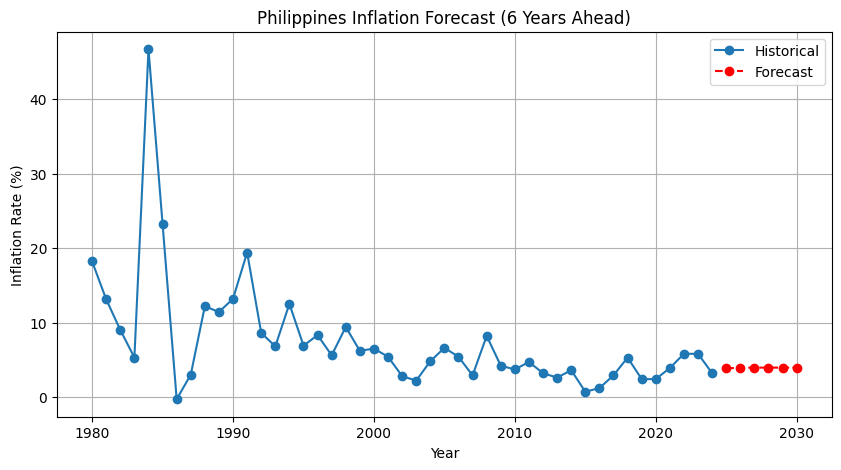

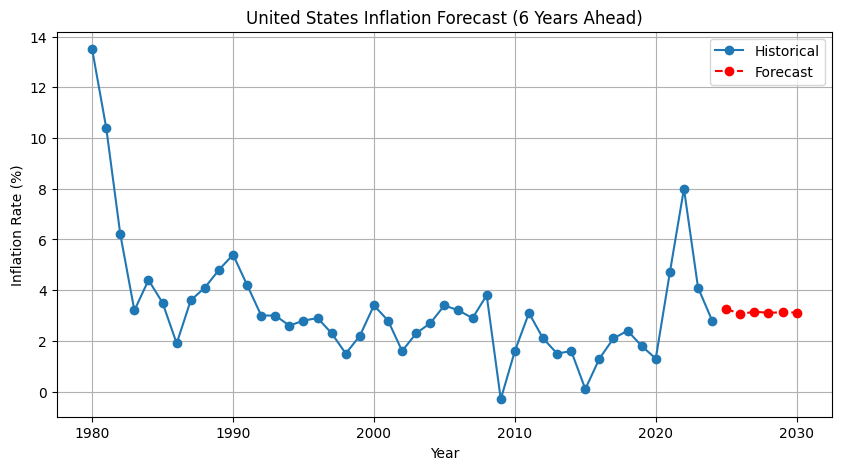

,year,forecast_inflation
0,2025,3.264286
1,2026,3.058086
2,2027,3.149664
3,2028,3.108992
4,2029,3.127056
5,2030,3.119033


In [27]:
forecast_arima(ph_data, "Philippines", steps=6)
forecast_arima(us_data, "United States", steps=6)



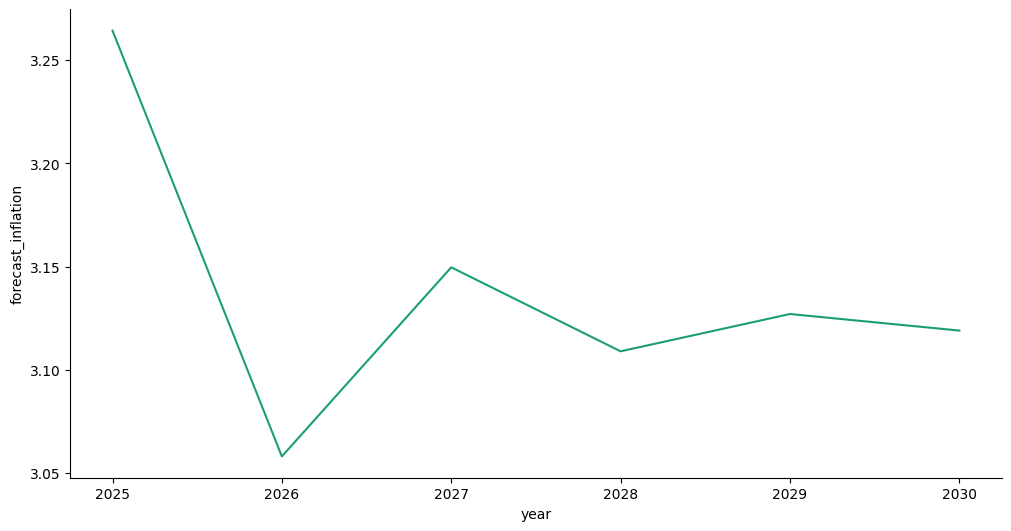

In [32]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['forecast_inflation']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('forecast_inflation')

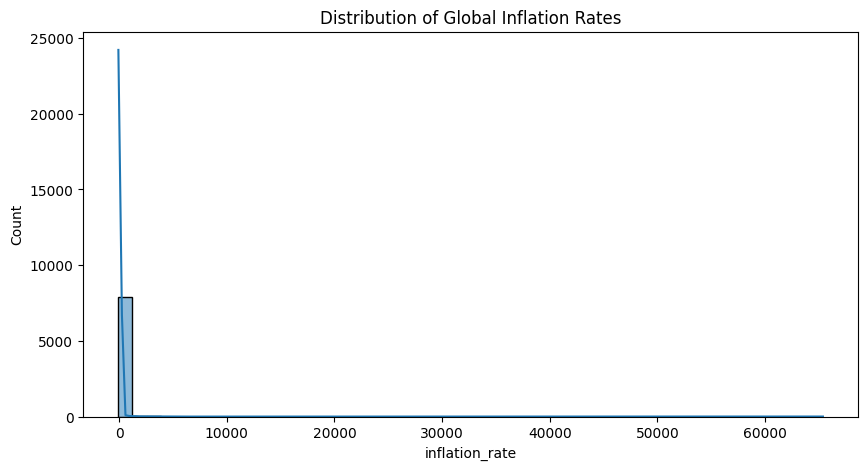

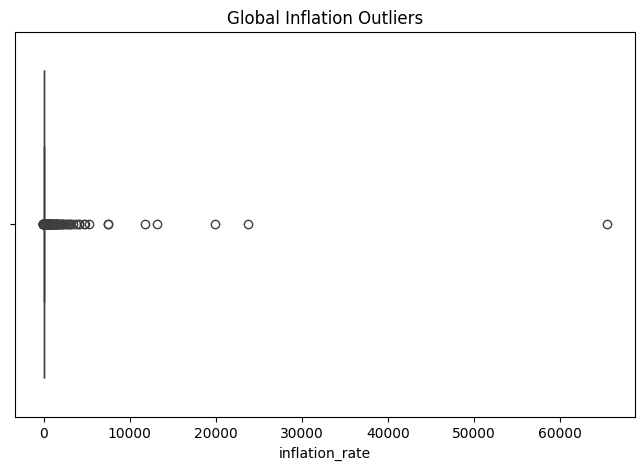

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df_long["inflation_rate"], bins=50, kde=True)
plt.title("Distribution of Global Inflation Rates")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df_long["inflation_rate"])
plt.title("Global Inflation Outliers")
plt.show()

In [30]:
print(df_long.info())
print(df_long.describe())
print(df_long['country_name'].nunique(), "countries")
print(df_long['year'].min(), "to", df_long['year'].max())
print("Missing values:\n", df_long.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 196 to 9015
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    7952 non-null   object 
 1   year            7952 non-null   float64
 2   inflation_rate  7952 non-null   float64
dtypes: float64(2), object(1)
memory usage: 248.5+ KB
None
              year  inflation_rate
count  7952.000000     7952.000000
mean   2003.341927       42.069447
std      12.686507      861.118508
min    1980.000000      -72.700000
25%    1993.000000        2.100000
50%    2004.000000        4.700000
75%    2014.000000       10.200000
max    2024.000000    65374.100000
196 countries
1980.0 to 2024.0
Missing values:
 country_name      0
year              0
inflation_rate    0
dtype: int64


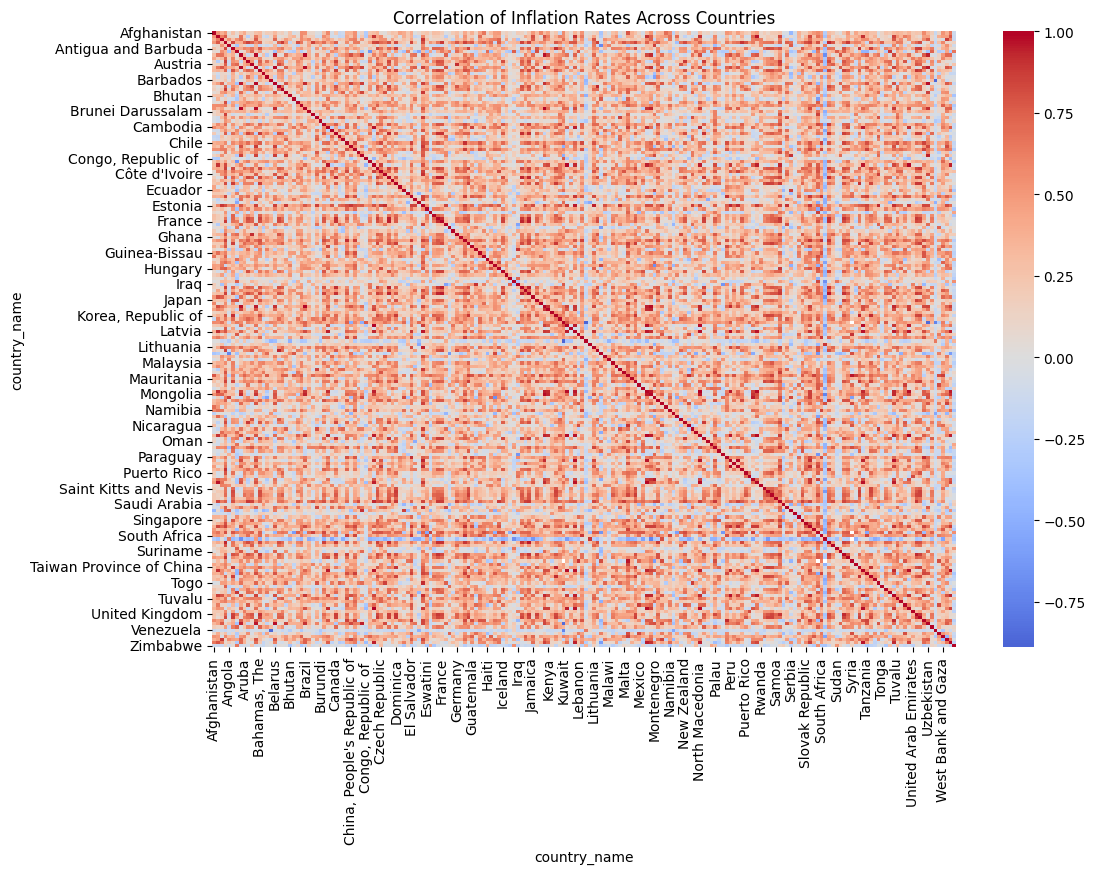

In [33]:
pivot_df = df_long.pivot(index="year", columns="country_name", values="inflation_rate")
corr = pivot_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation of Inflation Rates Across Countries")
plt.show()

In [41]:
def prepare_for_prophet(data, country):
    df_country = data[data["country_name"] == country][["year", "inflation_rate"]].copy()
    df_country.rename(columns={"year": "ds", "inflation_rate": "y"}, inplace=True)
    # Prophet expects ds as datetime
    df_country["ds"] = pd.to_datetime(df_country["ds"], format="%Y")
    return df_country


In [42]:
def prophet_forecast(data, country, years=5):
    df_country = prepare_for_prophet(data, country)

    # Fit model
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_country)

    # Future dataframe
    future = model.make_future_dataframe(periods=years, freq="Y")
    forecast = model.predict(future)

    # Plot forecast
    fig1 = model.plot(forecast)
    plt.title(f"{country} Inflation Forecast with Prophet ({years} years ahead)")
    plt.show()

    # Components (trend visualization)
    fig2 = model.plot_components(forecast)
    plt.show()

    return forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(years)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2aqjnm5/run9cd94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2aqjnm5/plm6llsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50842', 'data', 'file=/tmp/tmpc2aqjnm5/run9cd94.json', 'init=/tmp/tmpc2aqjnm5/plm6llsd.json', 'output', 'file=/tmp/tmpc2aqjnm5/prophet_modeljb51b6nf/prophet_model-20250926112143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


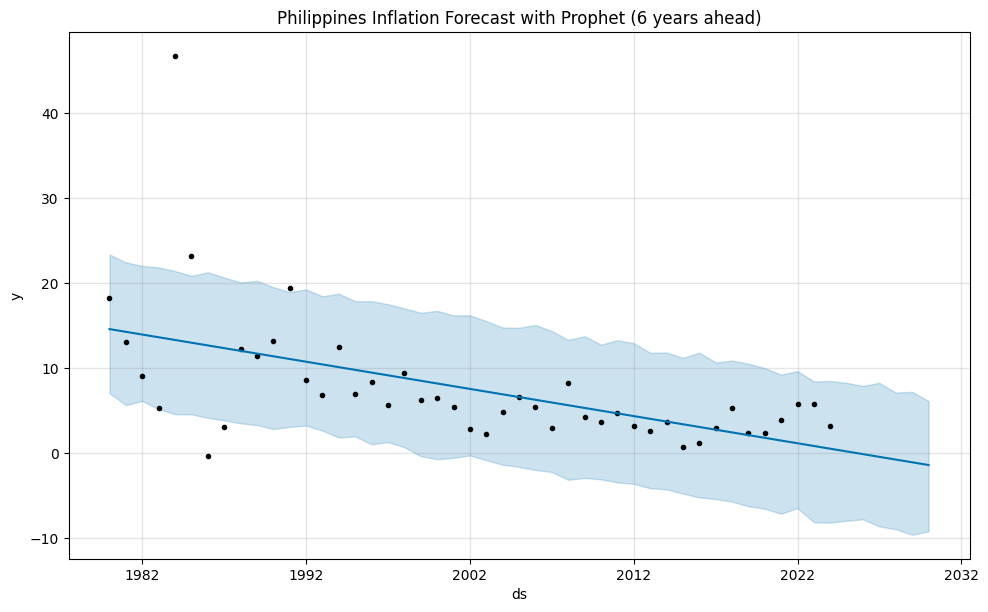

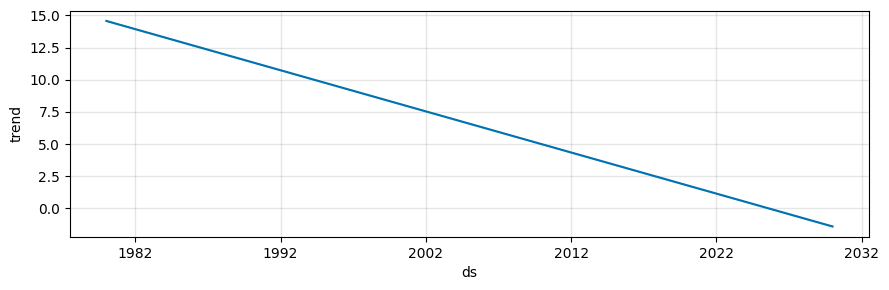

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2aqjnm5/91c2hzf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc2aqjnm5/f1_cbxqr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29811', 'data', 'file=/tmp/tmpc2aqjnm5/91c2hzf7.json', 'init=/tmp/tmpc2aqjnm5/f1_cbxqr.json', 'output', 'file=/tmp/tmpc2aqjnm5/prophet_model585txlj0/prophet_model-20250926112144.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


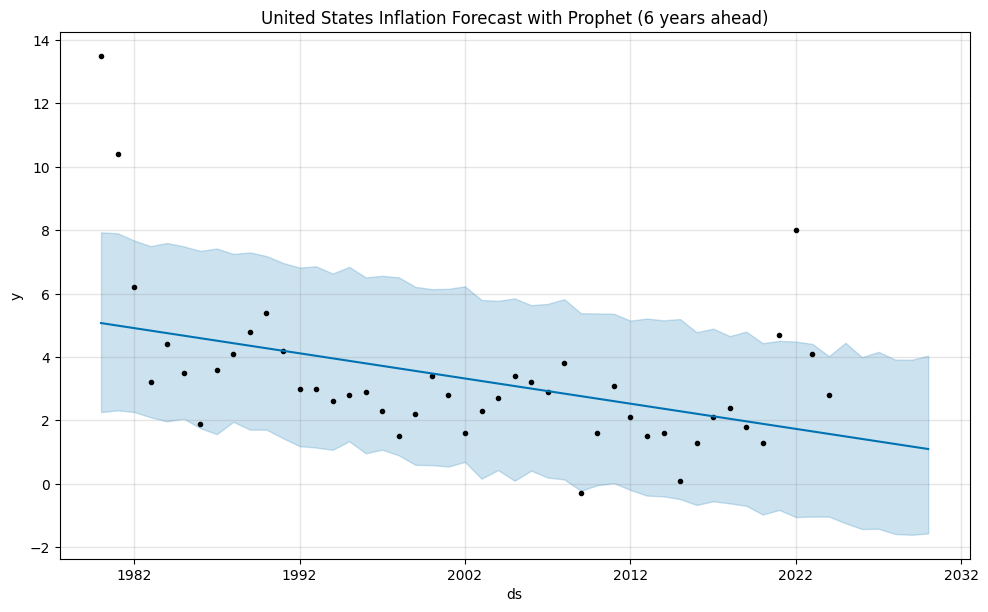

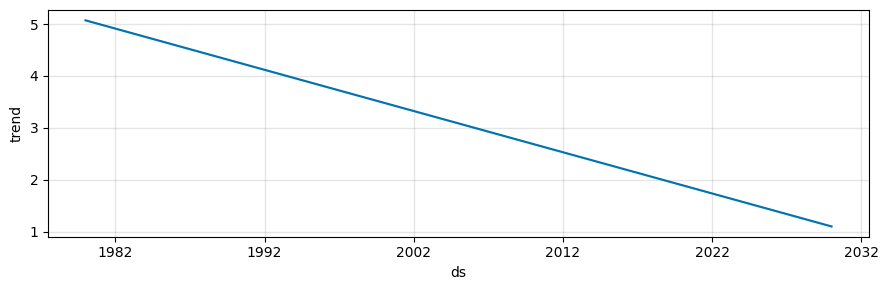

Philippines Forecast:
           ds      yhat  yhat_lower  yhat_upper
45 2024-12-31  0.181516   -7.968955    8.244486
46 2025-12-31 -0.138018   -7.800992    7.886973
47 2026-12-31 -0.457551   -8.646477    8.245247
48 2027-12-31 -0.777085   -8.970130    7.106868
49 2028-12-31 -1.097494   -9.623278    7.188611
50 2029-12-31 -1.417028   -9.212872    6.110103

United States Forecast:
           ds      yhat  yhat_lower  yhat_upper
45 2024-12-31  1.496081   -1.241955    4.450680
46 2025-12-31  1.416658   -1.426663    3.995064
47 2026-12-31  1.337234   -1.416803    4.163901
48 2027-12-31  1.257811   -1.582247    3.921299
49 2028-12-31  1.178170   -1.606839    3.914437
50 2029-12-31  1.098746   -1.565337    4.042650


In [44]:
forecast_ph = prophet_forecast(df_long, "Philippines", years=6)
forecast_us = prophet_forecast(df_long, "United States", years=6)

print("Philippines Forecast:")
print(forecast_ph)

print("\nUnited States Forecast:")
print(forecast_us)
